# День 01 — Дескриптивный и разведочный анализ данных

Пришло время познакомиться с данными получше. Когда начинаешь дескриптивный и разведочный анализ, никогда не знаешь, что найдешь. И найдешь ли что-то интересное вообще? Посмотрим, удастся ли нам найти какие-то любопытные инсайты на этом этапе анализа данных.

Для начала импортируй библиотеки, которые понадобятся нам в работе.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings("ignore")

## Загрузка данных

Сегодня мы проведем дескриптивный анализ наших данных. Прежде чем приступать к дескриптивному анализу, необходимо понять, с какими данными мы имеем дело, и заблаговременно принять меры по их изменению или доработке.

Загрузим наши данные

In [2]:
dataset_01_06 = pd.read_csv("/kaggle/input/dataset-01/dataset_01_06.csv")
dataset_07_12 = pd.read_csv("/kaggle/input/dataset-01/dataset_07_12.csv")

Атрибут `.shape` выведет разметы датасета: (Количество строк, Количество столбцов).

In [3]:
dataset_01_06.shape

(32092, 3648)

In [4]:
dataset_07_12.shape

(34661, 3648)

## Добавление нового признака

Для удобства проведения EDA давай объединим 2 датасета, но перед эти добавим признак `period`.

In [5]:
dataset_01_06["period"] = "1 полугодие"
dataset_07_12["period"] = "2 полугодие"

In [6]:
dataset_01_06["period"].head(5)

0    1 полугодие
1    1 полугодие
2    1 полугодие
3    1 полугодие
4    1 полугодие
Name: period, dtype: object

## Задание 1

Объедини датасеты `dataset_01_06` и `dataset_07_12` в один под названием `dataset`. 

Выведи размеры получившегося датасета.

In [7]:
dataset = pd.concat([dataset_01_06, dataset_07_12])
dataset.shape

(66753, 3649)

## Сбросить индекс

Так как ты объединил 2 датасета, у нас могут дублироваться индексы строк. Поэтому для удобства воспользуемся методом `reset_index` для того, чтобы спросить индексы строк.

In [8]:
dataset = dataset.reset_index()

## Фильтрация

Так как у нас данные за два полугодия, в нашем датасете могут оказаться данные по одному и тому же пользователю. Например, выберем пользователя с `id` 34657. Для этого отфильруем данные с помощью следующей конструкции:

`dataset['условие по выбору строк']`

In [9]:
# Выберем из датасета только те строки, которые удовлетволяют условию client_id = 106606
dataset[dataset["client_id"] == 106606] 

,index,prepay_ind_p1m,latitude_1m,building_type_key_1m,deferred_pay_1m,pay_count_p3m,crm_init_count_d1m,crm_out_count_p3m,prepay_ind_d2m,basic_day_debt_bad_max_d1m,...,is_multiscreen_p1m,avg_view_other_p1m,count_purchase_1m,avg_view_multi_1m,total_duration_1m,avg_view_adult_1m,avg_view_category_18_d3m,avg_view_tvmarket_p2m,avg_view_category_0_2m,period


## Задание 2

Пока у нас нет задачи изучить наших клиентов «в динамике», мы просто хотим описать нашего клиента.

Давай создадим переменную `dataset_unique`. В нее сохраним **последние** данные об **уникальных** клиентах. 
В этом тебе поможет метод [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) 
и его параметр `keep`.

Выведи количество строк получившегося датасета. Чтобы убедиться, что ты все выполнил верно, 
выполни код `assert len(dataset_unique) == 60699`. Он должен выполниться без ошибок.

In [10]:
dataset_unique = dataset.drop_duplicates(subset = ['client_id'], keep = 'last', inplace = False) 
len(dataset_unique)

60699

In [11]:
assert len(dataset_unique) == 60699

## Подсчет количества значений

Чтобы подсчитать **количество значений у признака**, 
сначала в квадратных скобочках выбери признак, который тебя интересует. Например, `['gender_1m']` — признак пола клиента. А затем воспользуйся методом `.value_counts()`.

In [12]:
dataset_unique['gender_1m'].value_counts()

gender_1m
2.0    30924
1.0    27447
0.0       42
Name: count, dtype: int64

В файле `attributes.xlsx` сказано:
> 0 - Неизвестно, 1 -
> Мужской, 2 - Женский

## Отрисовка графиков

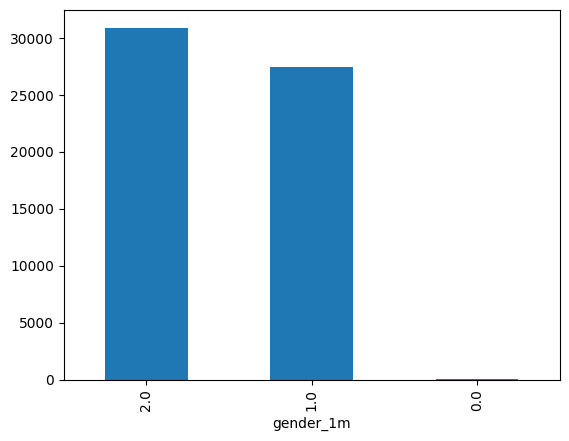

In [13]:
dataset_unique['gender_1m'].value_counts().plot.bar();

**Чтобы нарисовать график**, используй метод `.plot` и соответствующее название графика. Чтобы отрисовать стобцовую диаграмму, допиши `.bar()`

## Задание 3

Построй круговую диаграмму [pie-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html) 
по количеству ушедших клиентов. За отток клиента отвечает признак `label`.

Чтобы красиво дополнить график, добавь эти аргументы `autopct='%1.1f%%', legend=True, title='Ушедшие 
пользователи', ylabel=''`, в метод `pie()`. 

Какой процент пользователей отказался от наших услуг?

Процент ушедших пользователей: 4.2%


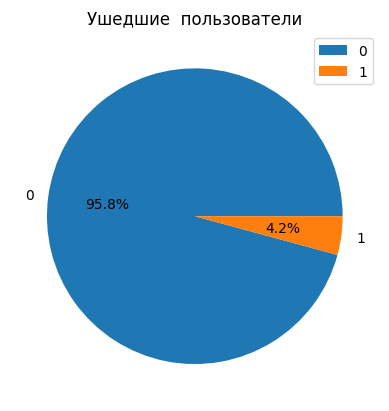

In [14]:
dataset_unique['label'].value_counts().plot.pie(autopct='%1.1f%%', legend=True, title='Ушедшие  пользователи', ylabel='');
percent_churn = dataset_unique['label'].value_counts(normalize=True)[1] * 100
print(f'Процент ушедших пользователей: {percent_churn:.1f}%')

## Задание 4

Первая гипотеза, которую все хотят проверить — если клиент часто обращается в поддержку, 
то ему что-то не нравится, и, возможно, он собирается отказаться от наших услуг (хотя на самом деле, часто все наоборот). 

C помощью функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) построй график «ящик с усами» 
по количеству обращений клиента **за 3 месяца** по ушедшим и оставшимся клиентам. В этом тебе поможет аргумент `hue`.

Отличается ли медиана количества обращений у ушедших и оставшихся клиентов?

Медиана не отличается


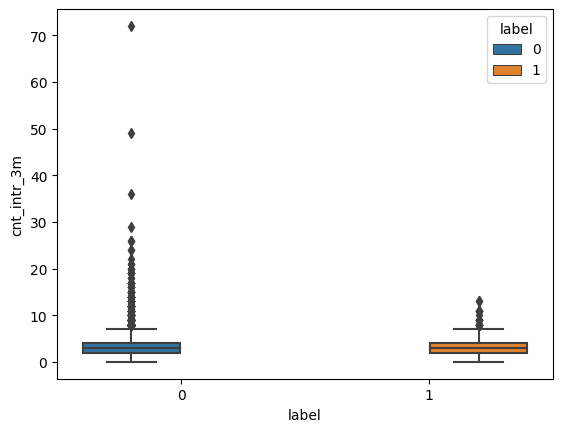

In [15]:
sns.boxplot(data=dataset_unique, y="cnt_intr_3m", x = "label",  hue = "label")
print("Медиана не отличается")

# Задание 5

У нас имеются данные баланса клиента. Данные баланса клиента **за 3 месяца** собраны в колонке `balance_sum_3m`. 
Интересно посмотреть, сколько в среднем клиенты держат на счетах. 

C помощью функции диаграмму [hist-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html) 
построй гистограмму баланса пользователей. Для функции `hist` используй аргумент `bins=200`. 

Также рассчитай среднее и медиану для колонки `balance_sum_3m`. Сохрани их в переменные `mean` и `median`. 
С помощью функции `plt.axvline` добавь эти статистики на гистограмму.

In [16]:
mean = dataset_unique['balance_sum_3m'].mean()
mean

3061.40372856225

In [17]:
median = dataset_unique['balance_sum_3m'].median()
median

2323.45

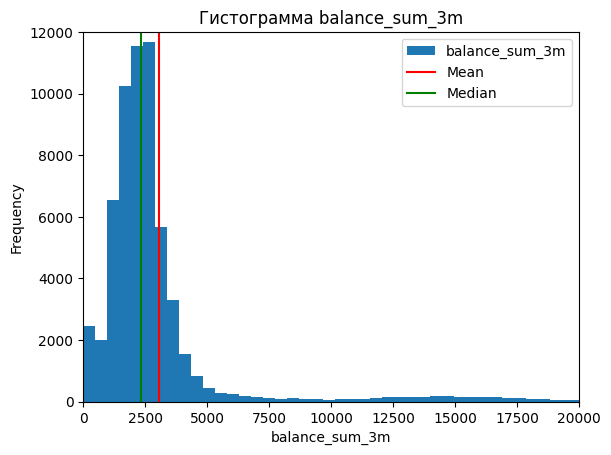

In [18]:
ax = dataset_unique.plot.hist(column=["balance_sum_3m"], bins=200)

# Добавление вертикальных линий для медианы и среднего
plt.axvline(x=mean, color='r', label='Mean')  # Вертикальная линия для среднего
plt.axvline(x=median, color='g', label='Median')  # Вертикальная линия для медианы

# Настройка ограничений осей
plt.xlim([0, 20000])  # Ограничение оси Х от 0 до 20.000
plt.ylim([0, 12000])  # Ограничение оси Y от 0 до 12.000

# Добавление легенды
plt.legend()

# Показать график
plt.title('Гистограмма balance_sum_3m')
plt.xlabel('balance_sum_3m')
plt.ylabel('Frequency')
plt.show()

## Сводная таблица

Теперь было бы интересно посмотреть изменение количества ушедших/оставшихся пользователей. В этом нам помогут сводные таблицы.
Воспользуемся функцией `pd.pivot_table`.

In [19]:
table = pd.pivot_table(
    dataset,  # Указываем нашу таблицу
    values='client_id',  # Указываем значение, по которому будем осуществлять сводку. В данном случае это уникальный id клиента
    index='period', # Индекс таблицы
    columns='label',  # Колонки таблицы
    aggfunc='count' # Какую функцию будет применять к values.
)

In [20]:
table

label,0,1
period,,
1 полугодие,30950,1142
2 полугодие,33235,1426


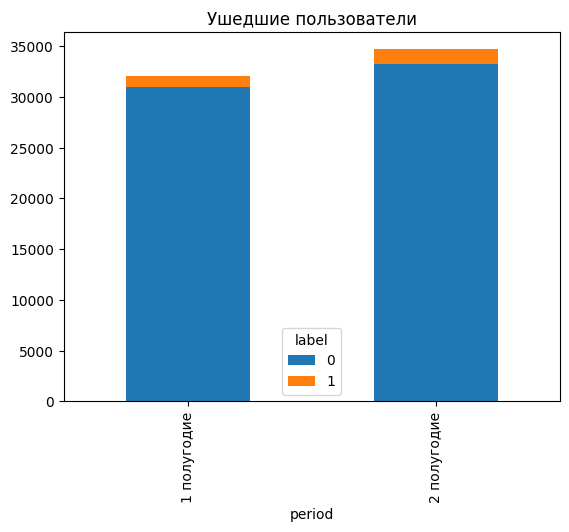

In [21]:
table.plot.bar(legend=True, title='Ушедшие пользователи', stacked=True);

## Задание 6

А какую статистику о клиенте хотел бы визуализировать ты? Надеемся, что за предыдущие задания у тебя уже появились 
гипотезы, которые ты бы хотел визуализировать.

Используй инструменты, с которыми ты познакомился ранее, и визуализируй статистики, интересные лично тебе. 
Чем больше, тем лучше. :)


In [22]:
dataset_unique.columns

Index(['index', 'prepay_ind_p1m', 'latitude_1m', 'building_type_key_1m',
       'deferred_pay_1m', 'pay_count_p3m', 'crm_init_count_d1m',
       'crm_out_count_p3m', 'prepay_ind_d2m', 'basic_day_debt_bad_max_d1m',
       ...
       'is_multiscreen_p1m', 'avg_view_other_p1m', 'count_purchase_1m',
       'avg_view_multi_1m', 'total_duration_1m', 'avg_view_adult_1m',
       'avg_view_category_18_d3m', 'avg_view_tvmarket_p2m',
       'avg_view_category_0_2m', 'period'],
      dtype='object', length=3650)

pay_count_p1m    0.0      1.0     2.0    3.0   4.0   5.0   6.0   7.0   8.0   \
period                                                                        
1 полугодие    1537.0  21445.0  2620.0  350.0  60.0  16.0   6.0   3.0   1.0   
2 полугодие    1225.0  28861.0  4073.0  408.0  68.0  12.0   7.0   1.0   1.0   

pay_count_p1m  9.0   11.0  21.0  
period                           
1 полугодие     NaN   NaN   NaN  
2 полугодие     3.0   1.0   1.0  


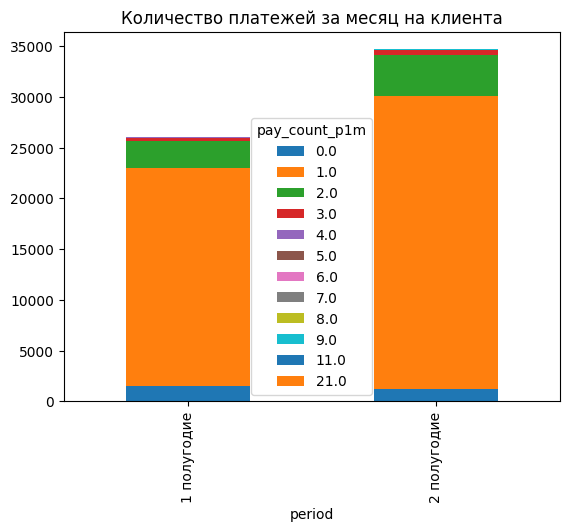

In [23]:
table_new = pd.pivot_table(
    dataset_unique,  
    values='client_id',  
    index='period', 
    columns='pay_count_p1m',  # Колонка кол-во платежей в текущем месяце
    aggfunc='count' 
)
print(table_new)
table_new.plot.bar(legend=True, title='Количество платежей за месяц на клиента', stacked=True);

## Задание 7

Используя библиотеку [Plotly и функции Density Mapbox](https://plotly.com/python/mapbox-density-heatmaps/), отрисуй тепловую карту клиентов по **времени жизни клиента**. 

Для этого тебе потребуется найти атрибуты, отвечающие за координаты клиентов (ширина, долгота) и атрибут времени жизни клиента. Найди, с каким суффиксом эти атрибуты хранятся в наших данных, и используй эти данные для построения тепловой карты.

In [24]:
import plotly.express as px
fig = px.density_map(dataset_unique, lat='latitude_1m', lon='longitude_1m', z='lifetime_1m', radius=5,
                        center=dict(lat=50, lon=40), zoom=5,
                        map_style="open-street-map")
fig.show()